In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import seaborn as sns
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.shape

(5572, 5)

# Clean Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# remove unuseful columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [8]:
# rename cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [9]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
#0 == NO SPAM  
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [10]:
df.isnull().sum()

df.duplicated().sum()

df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

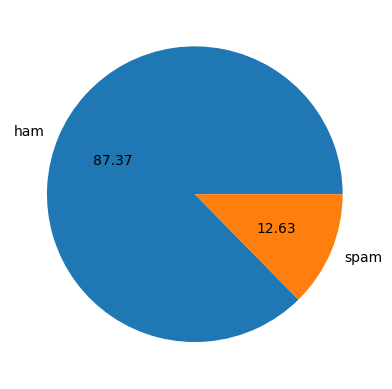

In [13]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters'] = df['text'].apply(len)
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [16]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [17]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [18]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

<Axes: xlabel='num_characters', ylabel='Count'>

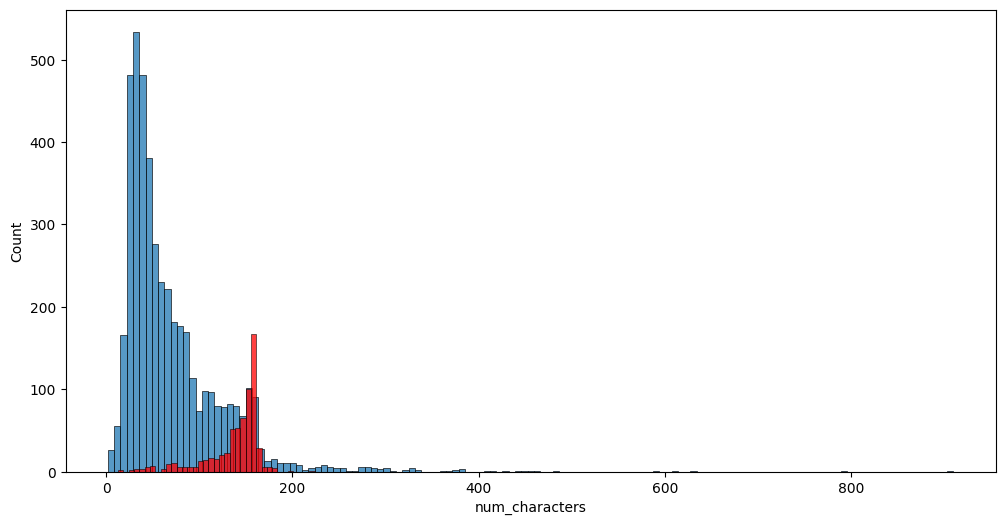

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
#Spam SMS's trends to have a greater number of chars

<Axes: xlabel='num_words', ylabel='Count'>

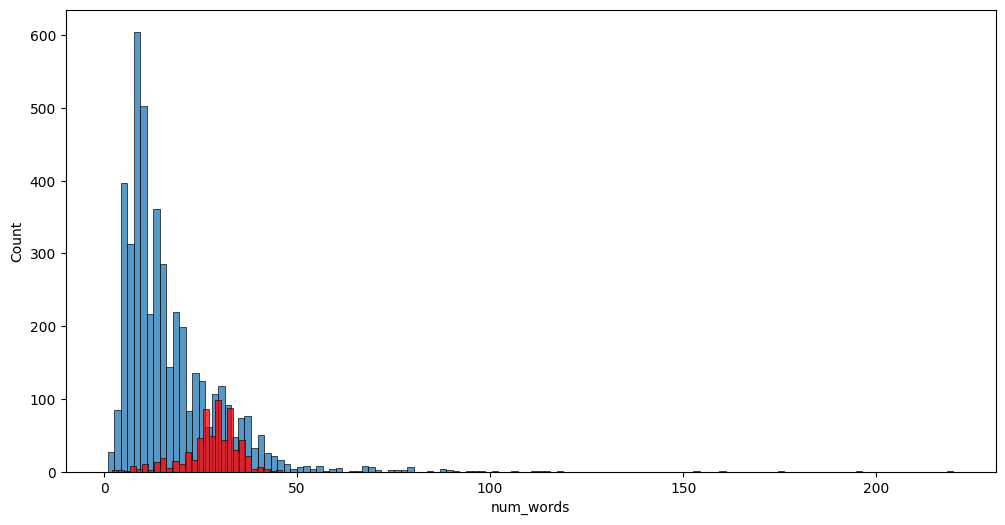

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

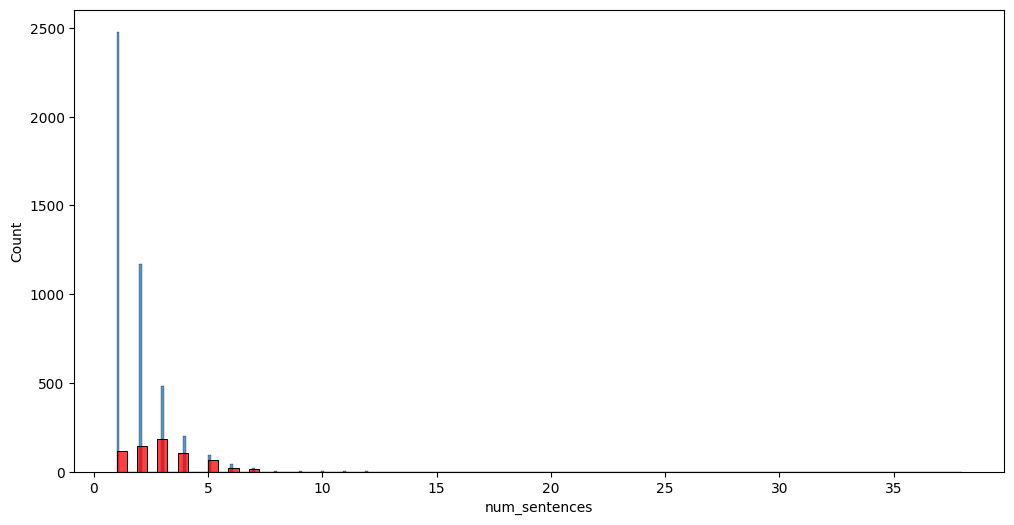

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

# Preprocessing Data

In [22]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    # Remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    # Remove stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    # Steamming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [24]:
transform_text("Hi! How is it going?")


'hi go'

In [25]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [26]:
transform_text(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [27]:
df['transformed_text'] = df['text'].apply(transform_text)

In [77]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [29]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [30]:
len(spam_corpus)

9939

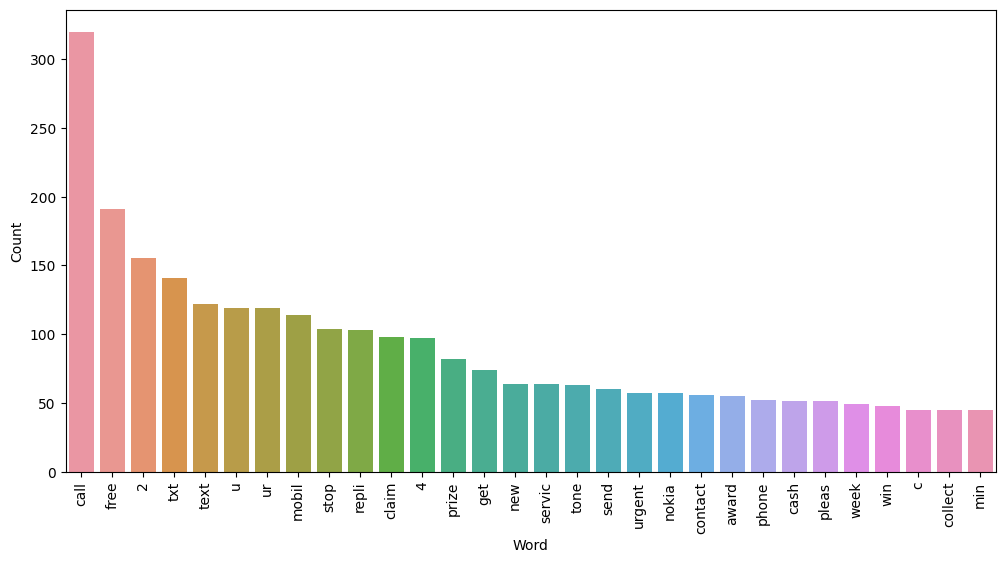

In [31]:
from collections import Counter
word_counts = Counter(spam_corpus)

word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [33]:
len(ham_corpus)

35404

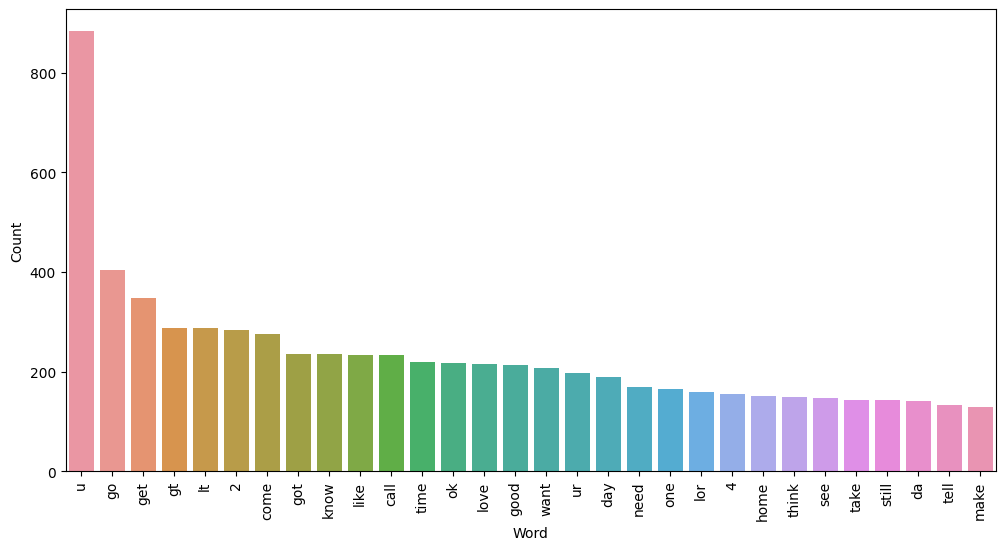

In [34]:
word_counts_ham = Counter(ham_corpus)

word_counts_df = pd.DataFrame(word_counts_ham.most_common(30), columns=['Word', 'Count'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [35]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [36]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [37]:
X.shape

(5169, 3000)

In [38]:
y = df['target'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [70]:
# Test naive bayes models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [44]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [46]:
# tfidf --> BNB

In [47]:
# Testing more classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [49]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'LR': lrc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [50]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,recall

In [51]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865, 0.8405797101449275)

In [52]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [53]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores})

In [54]:
performance_df

Algorithm  Accuracy  Precision    Recall
0       SVC  0.975822   0.974790  0.840580
1        KN  0.905222   1.000000  0.289855
2        NB  0.970986   1.000000  0.782609
3        LR  0.958414   0.970297  0.710145
4  AdaBoost  0.960348   0.929204  0.760870
5       ETC  0.974855   0.974576  0.833333
6      GBDT  0.946809   0.919192  0.659420
7       xgb  0.967118   0.926230  0.818841

In [55]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [56]:
performance_df1

Algorithm   variable     value
0        SVC   Accuracy  0.975822
1         KN   Accuracy  0.905222
2         NB   Accuracy  0.970986
3         LR   Accuracy  0.958414
4   AdaBoost   Accuracy  0.960348
5        ETC   Accuracy  0.974855
6       GBDT   Accuracy  0.946809
7        xgb   Accuracy  0.967118
8        SVC  Precision  0.974790
9         KN  Precision  1.000000
10        NB  Precision  1.000000
11        LR  Precision  0.970297
12  AdaBoost  Precision  0.929204
13       ETC  Precision  0.974576
14      GBDT  Precision  0.919192
15       xgb  Precision  0.926230
16       SVC     Recall  0.840580
17        KN     Recall  0.289855
18        NB     Recall  0.782609
19        LR     Recall  0.710145
20  AdaBoost     Recall  0.760870
21       ETC     Recall  0.833333
22      GBDT     Recall  0.659420
23       xgb     Recall  0.818841

/home/mario/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


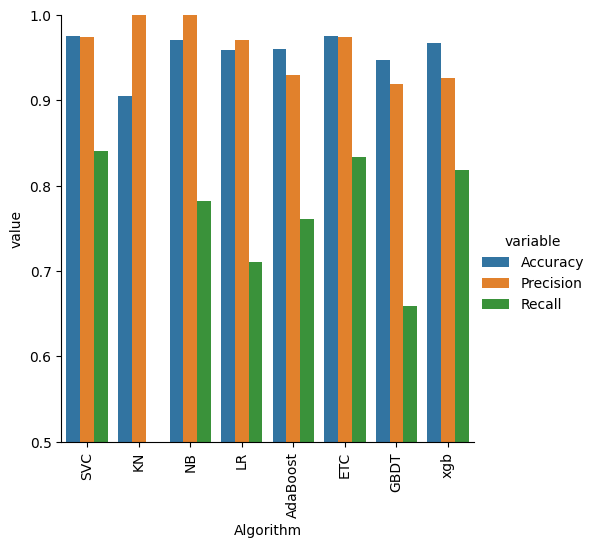

In [57]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'Recall_max_ft_3000':recall_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [59]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores,'Recall_scaling':recall_scores}).sort_values('Precision_scaling',ascending=False)

In [60]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores,'Recall_scaling':recall_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision    Recall  Accuracy_scaling_x  \
0       SVC  0.975822   0.974790  0.840580            0.975822   
1        KN  0.905222   1.000000  0.289855            0.905222   
2        NB  0.970986   1.000000  0.782609            0.970986   
3        LR  0.958414   0.970297  0.710145            0.958414   
4  AdaBoost  0.960348   0.929204  0.760870            0.960348   
5       ETC  0.974855   0.974576  0.833333            0.974855   
6      GBDT  0.946809   0.919192  0.659420            0.946809   
7       xgb  0.967118   0.926230  0.818841            0.967118   

   Precision_scaling_x  Recall_scaling_x  Accuracy_scaling_y  \
0             0.974790          0.840580            0.975822   
1             1.000000          0.289855            0.905222   
2             1.000000          0.782609            0.970986   
3             0.970297          0.710145            0.958414   
4             0.929204          0.760870            0.960348   
5             0.974576          0.833333            0.974855   
6             0.919192          0.659420            0.946809   
7             0.926230          0.818841            0.967118   

   Precision_scaling_y  Recall_scaling_y  Accuracy_num_chars  \
0             0.974790          0.840580            0.975822   
1             1.000000          0.289855            0.905222   
2             1.000000          0.782609            0.970986   
3             0.970297          0.710145            0.958414   
4             0.929204          0.760870            0.960348   
5             0.974576          0.833333            0.974855   
6             0.919192          0.659420            0.946809   
7             0.926230          0.818841            0.967118   

   Precision_num_chars  Recall_scaling  
0             0.974790        0.840580  
1             1.000000        0.289855  
2             1.000000        0.782609  
3             0.970297        0.710145  
4             0.929204        0.760870  
5             0.974576        0.833333  
6             0.919192        0.659420  
7             0.926230        0.818841

In [61]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [62]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', bnb), ('et', etc)],voting='soft')

In [63]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', BernoulliNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [64]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 1.0
Recall 0.8840579710144928


In [65]:
# Applying stacking
estimators=[('svm', svc), ('nb', bnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [66]:
from sklearn.ensemble import StackingClassifier

In [67]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [68]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9696969696969697
Recall 0.927536231884058


In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model2.pkl','wb'))